In [91]:
!pip install pandas
!pip install spacy
!pip install gensim
!pip install tqdm

In [4]:
import os, sys
sys.path.append(os.path.join(os.path.dirname("F:\Projects\PycharmProjects\PythonInterpreter\Lib\site-packages"), "site-packages"))
os.sys.path

['F:\\Programes\\JetBrains\\PyCharm 2021.3.1\\plugins\\python\\helpers-pro\\jupyter_debug',
 'F:\\Programes\\JetBrains\\PyCharm 2021.3.1\\plugins\\python\\helpers\\pydev',
 'F:\\Projects\\PycharmProjects\\Bag of words with Word2Vec',
 'F:\\Projects\\PycharmProjects\\Bag of words with Word2Vec',
 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip',
 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python310\\DLLs',
 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python310\\lib',
 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python310',
 '',
 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python310\\site-packages',
 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32',
 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python310\\site-packages\\win32\\lib',
 'C:\\Users\\ASUS\\AppData\\Roaming\\Python\\Python310\\site-packages\\Pythonwin',
 'C:\\Users\\ASUS\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages',
 'C:\\User

In [171]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec
from nltk.stem.porter import PorterStemmer
from tqdm import tqdm

Essay Clustering Algorithm #Cluster based on Key Identification

In [94]:
data = pd.DataFrame([[0,0],[1,1],[1,2],[0,2]])
data

,0,1
0,0,0
1,1,1
2,1,2
3,0,2


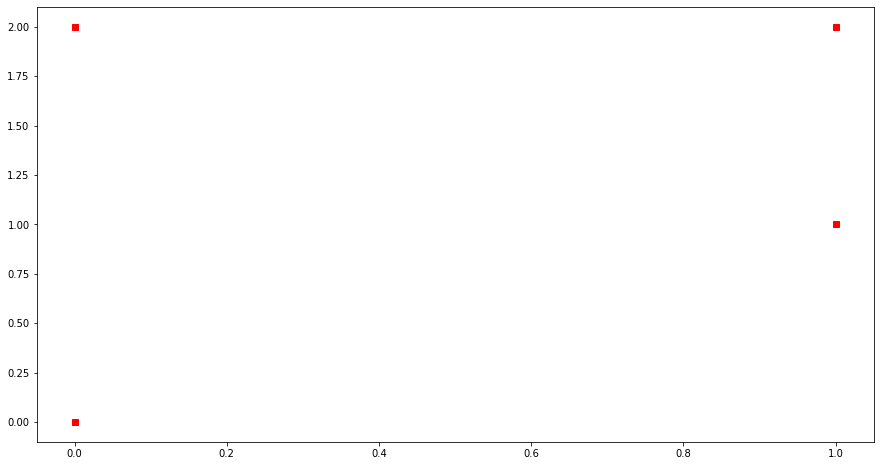

In [103]:
from matplotlib import pyplot as plt
N = len(data)
plt.figure(figsize=(15,8))
plt.plot(data[0], data[1], 'rs')

In [104]:
from sklearn.metrics import pairwise_distances
D_orginal = pd.DataFrame(pairwise_distances(data))
D_orginal

,0,1,2,3
0,0.000000,1.414214,2.236068,2.000000
1,1.414214,0.000000,1.000000,1.414214
2,2.236068,1.000000,0.000000,1.000000
3,2.000000,1.414214,1.000000,0.000000


In [105]:
def R(p_index,k_index):
    R_p = []
    if k_index == 0:
        return []
    for p in range(N):
        a = []
        for k in range(N-1):
            list_index = [i for i in D_orginal.loc[p].sort_values().drop(index=p).index[0:k+1]]
            a.append(list_index)
        R_p.append(a)
    return R_p[p_index][k_index-1]
R(1,3)

[2, 0, 3]

In [ ]:
k = 3
g = 2
L = [i for i in range(N)]
C_previous = N
C_current = N/g
D_current = D_orginal
for i in range(N):
    for j in range(N):
        a = 1 / np.power(k+1, 2)
        b = D_orginal[i][j]
        D_current[i][j] = a * b
D_current

In [ ]:
for i in range(N):
    if i not in key_elements:
        L[i] = D_current[L[i]][j].min()
L

In [ ]:
for i in key_elements:
    for j in key_elements:
        # a = 1 / len(key_elements[i]) * len(key_elements[j])
        a = 1
        b = D_orginal[i][j]
        D_current[i][j] = a * b
D_current

In [ ]:
C_previous = C_current
C_current = C_current/g

# Key Identification step

In [106]:
list = []
for i in range(N):
    list.append(D_orginal[i].mean())
mean = pd.DataFrame({'mean':list}).sort_values(by='mean').reset_index()
mean

,index,mean
0,1,0.957107
1,2,1.059017
2,3,1.103553
3,0,1.412570


In [108]:
c = 4
I1 = mean['index'][0]
n = 1
S = {I1}
key_elements = [*S, ]
if c == n:
    None
else:
    K1 = [i for i in range(N) if i != I1]
    I = D_orginal[I1].sort_values(ascending=False).index[0]
    K = [i for i in K1 if i != I]
    n +=1
    S.add(I)
    key_elements.append(I)
    while n != c:

        index = []
        sim = []
        for p in range(N):
            if p not in S:
                index.append(p)
                sim.append(min([D_orginal[p][i] for i in range(N) if S.intersection({i}) != set()]) )
        remain_data = pd.DataFrame({'index':index,'sim':sim}).sort_values(by='sim',ascending=False).reset_index()

        I = remain_data['index'][0]
        print(key_elements)
        K = [i for i in K if i != I]
        S.add(I)
        key_elements.append(I)
        n += 1
    else:
        print(key_elements)


[1, 0]
[1, 0, 3]
[1, 0, 3, 2]


In [119]:
index = 1
for key in key_elements:
    print(f'Key item {index}: {data.loc[key].values}')
    index += 1

Key item 1: [1 1]
Key item 2: [0 0]
Key item 3: [0 2]
Key item 4: [1 2]


# Classify Reddit users' comments with BagOfWord + Word2Vec

## read train and test datasets

In [24]:
def load_data(path):
    return pd.read_csv(path)

In [25]:
# Train Data
train_data = load_data(path = 'train.csv')
print('Train Data Shape:', train_data.shape)
print('Train Data Valeus:', train_data.columns.values)

# Test Data
test_data = load_data(path = 'test.csv')
print('Test Data Shape:', test_data.shape)
print('Test Data Valeus:', test_data.columns.values)

Train Data Shape: (8695, 3)
Train Data Valeus: ['Id' 'Comment' 'Topic']
Test Data Shape: (1586, 3)
Test Data Valeus: ['Id' 'Comment' 'Topic']


## check missing value and duplicate record

In [12]:
from itertools import compress

# Convert space value in *content* attribute to NaN value.
for i in range(1,len(train_data)):
    if train_data['Topic'][i] == ' ':
        train_data['Topic'][i] = None

for i in range(1,len(test_data)):
    if test_data['Topic'][i] == ' ':
        test_data['Topic'][i] = None


# Check Duplicated records
duplicate = train_data.duplicated()
duplicate_index = list(compress(range(len(duplicate)), duplicate))
print(f"*** train's attribute {duplicate_index} has *Duplicated* records ***\n")

duplicate = test_data.duplicated()
duplicate_index = list(compress(range(len(duplicate)), duplicate))
print(f"*** test's attribute {duplicate_index} has *Duplicated* records ***\n")

*** train's attribute [] has *Duplicated* records ***

*** test's attribute [] has *Duplicated* records ***



In [13]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8695 entries, 0 to 8694
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       8695 non-null   object
 1   Comment  8695 non-null   object
 2   Topic    8695 non-null   object
dtypes: object(3)
memory usage: 203.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586 entries, 0 to 1585
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Id       1586 non-null   object
 1   Comment  1586 non-null   object
 2   Topic    1586 non-null   object
dtypes: object(3)
memory usage: 37.3+ KB
None


In [14]:
train_data

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry
...,...,...,...
8690,0x1e02,I make similar observations over the last week...,Biology
8691,0xc8d,You would know.,Biology
8692,0x723,Also use the correct number of sig figs,Chemistry
8693,0x667,"What about the ethical delimmas, groundbreaki...",Biology


In [15]:
test_data

,Id,Comment,Topic
0,0x1aa9,Personally I have no idea what my IQ is. I’ve ...,Biology
1,0x25e,I'm skeptical. A heavier lid would be needed t...,Physics
2,0x1248,I think I have 100 cm of books on the subject....,Biology
3,0x2b9,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,0x24af,"In addition to the other comment, you can crit...",Physics
...,...,...,...
1581,0x22bf,I’m not really denying your intent. I’m a) dou...,Chemistry
1582,0x1f4a,i really empathize with your compassion for bu...,Biology
1583,0x27b7,"If you want to keep it for more than 2 weeks, ...",Chemistry
1584,0x2066,Same here. I’m in nursing school so I only hav...,Biology


## natural language preprocessing

In [160]:
# Get stopwords list
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

custom_stop_words = {'br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
                     "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his',
                     'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
                     'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll",
                     'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
                     'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because',
                     'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into',
                     'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out',
                     'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
                     'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only',
                     'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't",
                     'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
                     'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
                     'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',
                     "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
                     "won't", 'wouldn', "wouldn't", "interesting", "interest", "also", "could", "would"}

def cleanup(review):

    # Remove Markups or HTML tags
    review =  BeautifulSoup(review).get_text()

    # Remove Numbers
    review = re.sub('[^a-zA-Z]', ' ', review)

    # Remove words with numbers for exp: 'A55D'
    review = re.sub("\S*\d\S*", " ", review).strip()

    # Convert to lowercase
    review = review.lower()

    #Tokenize
    word_tokens = word_tokenize(review)

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    word_tokens = [lemmatizer.lemmatize(token) for token in word_tokens]

    # Stemming
    # stemmer = PorterStemmer()
    # word_tokens = [stemmer.stem(word) for word in word_tokens]

    # Remove stop words
    review = [word for word in word_tokens if not word in stop_words and not len(word)<3
              and not word in custom_stop_words]

    # Rejoin the review words into one string
    review = ' '.join(review)

    # Remove repeated characters
    review = re.sub(r'(.)\1{2,}',' ', review)

    return review

def process_data(data, data_type):

    # Create a new DataFrame
    cleaned_data = data.copy()

    reviews = []
    for i, review in enumerate(data['Comment']):
        cleaned_review = cleanup(review)
        reviews.append(cleaned_review)

        if i % 100 == 0:
            print(f'Processing "{data_type}", {i} Review...')

    cleaned_data['Comment'] = reviews

    return cleaned_data

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [161]:
# Train Data
cleaned_train_data = process_data(train_data, data_type = 'Train Data')

# Test Data
cleaned_test_data = process_data(test_data, data_type = 'Test Data')

Processing "Train Data", 0 Review...
Processing "Train Data", 100 Review...
Processing "Train Data", 200 Review...
Processing "Train Data", 300 Review...
Processing "Train Data", 400 Review...

C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(



Processing "Train Data", 500 Review...
Processing "Train Data", 600 Review...
Processing "Train Data", 700 Review...
Processing "Train Data", 800 Review...
Processing "Train Data", 900 Review...
Processing "Train Data", 1000 Review...
Processing "Train Data", 1100 Review...
Processing "Train Data", 1200 Review...
Processing "Train Data", 1300 Review...
Processing "Train Data", 1400 Review...
Processing "Train Data", 1500 Review...
Processing "Train Data", 1600 Review...
Processing "Train Data", 1700 Review...
Processing "Train Data", 1800 Review...
Processing "Train Data", 1900 Review...
Processing "Train Data", 2000 Review...
Processing "Train Data", 2100 Review...
Processing "Train Data", 2200 Review...
Processing "Train Data", 2300 Review...
Processing "Train Data", 2400 Review...
Processing "Train Data", 2500 Review...
Processing "Train Data", 2600 Review...
Processing "Train Data", 2700 Review...
Processing "Train Data", 2800 Review...
Processing "Train Data", 2900 Review...
Proc

In [133]:
cleaned_train_data.head(5)

,Id,Comment,Topic
0,0x840,thing might neg frequenc depend select least c...,Biology
1,0xbf0,hard believ exist particular detect anyth inve...,Physics
2,0x1dfc,bee,Biology
3,0xc7e,medic technician alot drug liver probabl die i...,Biology
4,0xbba,cesium pretti metal,Chemistry


In [134]:
cleaned_test_data.head(5)

,Id,Comment,Topic
0,0x1aa9,person idea never test howev test outdat inacc...,Biology
1,0x25e,skeptic heavier lid need build pressur lighter...,Physics
2,0x1248,think book subject problem conscious univers a...,Biology
3,0x2b9,chemistri hard uni ive read somewher hardest d...,Chemistry
4,0x24af,addit comment critic theori without check lot ...,Physics


In [162]:
cleaned_train_reviews = cleaned_train_data['Comment']
cleaned_test_reviews = cleaned_test_data['Comment']

## create BagOfWord vector for each sample/sentence

In [163]:
vectorizer = CountVectorizer()

train_data_features = vectorizer.fit_transform(cleaned_train_reviews)
train_data_vocab = vectorizer.get_feature_names_out()
train_data_features = train_data_features.toarray()
dictionary_train = pd.DataFrame(data=train_data_features,columns=vectorizer.get_feature_names_out())

test_data_features = vectorizer.fit_transform(cleaned_test_reviews)
test_data_vocab = vectorizer.get_feature_names_out()
test_data_features = test_data_features.toarray()
dictionary_test = pd.DataFrame(data=test_data_features,columns=vectorizer.get_feature_names_out())

print(f'bagOfWords of train_data shape: {train_data_features.shape}')
print(f'bagOfWords of test_data shape: {test_data_features.shape}')

bagOfWords of train_data shape: (8695, 15008)
bagOfWords of test_data shape: (1586, 9726)


In [256]:
dictionary_train

,aah,aaps,aaronson,aat,abailable,abandon,abbreviation,abd,abdomen,abdominal,...,zoidberg,zone,zoom,zotero,ztsi,zubairy,zurich,zwitterion,zygomatic,zyklon
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8691,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8693,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
dictionary_test

,aapt,abandon,abandoned,abc,abdomen,abdominal,abe,ability,abinbev,abiogenesis,...,zinc,zip,zipper,zippo,zohaib,zona,zone,zoxyz,zurich,zwicky
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
train_data_vocab

array(['aah', 'aap', 'aaronson', ..., 'zwitterion', 'zygomat', 'zyklon'],
      dtype=object)

In [140]:
test_data_vocab

array(['aapt', 'abandon', 'abc', ..., 'zoxyz', 'zurich', 'zwicki'],
      dtype=object)

In [141]:
# model_w2v = api.load("word2vec-google-news-300")

In [142]:
w2v_model_google=KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [230]:
def list_of_sentence(data):
    list_of_sentence=[]
    for sentence in data:
        list_of_sentence.append(sentence.split())
    return list_of_sentence

train_sentences = list_of_sentence(cleaned_train_reviews)
test_sentences = list_of_sentence(cleaned_test_reviews)
all_sentences = list_of_sentence(cleaned_train_reviews.append(cleaned_test_reviews))
# Train Word2Vec model using own text corpus
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(all_sentences,min_count=5, workers=16)
print(w2v_model.wv.most_similar('great'))
print('='*50)
print(w2v_model.wv.most_similar('worst'))

C:\Users\ASUS\AppData\Local\Temp\ipykernel_30204\2713069799.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sentances = list_of_sentance(cleaned_train_reviews.append(cleaned_test_reviews))


[('general', 0.9994341135025024), ('best', 0.9994133710861206), ('professor', 0.9993730187416077), ('course', 0.9992820620536804), ('university', 0.9992630481719971), ('easy', 0.9992470741271973), ('looking', 0.999234139919281), ('program', 0.9992258548736572), ('went', 0.9991999268531799), ('start', 0.9991911053657532)]
[('instead', 0.9991294741630554), ('scientist', 0.9991053342819214), ('random', 0.9991041421890259), ('remember', 0.9990876913070679), ('leave', 0.9990850687026978), ('method', 0.9990643262863159), ('nit', 0.999058187007904), ('towards', 0.9990547895431519), ('mix', 0.9990513920783997), ('particular', 0.9990360140800476)]


In [147]:
len(w2v_model_google)

3000000

In [148]:
print(w2v_model_google.most_similar('great'))
print('='*50)
print(w2v_model_google.most_similar('worst'))

[('terrific', 0.7989331483840942), ('fantastic', 0.7935212254524231), ('tremendous', 0.7748855352401733), ('wonderful', 0.7647868990898132), ('good', 0.7291510105133057), ('incredible', 0.7032873630523682), ('marvelous', 0.6971103549003601), ('phenomenal', 0.6841564178466797), ('amazing', 0.663412868976593), ('awesome', 0.6510507464408875)]
[('Worst', 0.6146091818809509), ('weakest', 0.6143776774406433), ('scariest', 0.5957257747650146), ('ugliest', 0.5931181311607361), ('best', 0.5835111141204834), ('bleakest', 0.5718506574630737), ('strongest', 0.567145586013794), ('nastiest', 0.5644308924674988), ('lousiest', 0.563145101070404), ('toughest', 0.5624396204948425)]


In [231]:
w2v_words = list(w2v_model.wv.index_to_key)
print("number of words that occured minimum 1 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 1 times  5111
sample words  ['like', 'one', 'get', 'time', 'think', 'know', 'make', 'thing', 'people', 'much', 'even', 'way', 'need', 'really', 'http', 'good', 'see', 'water', 'energy', 'work', 'look', 'lot', 'well', 'say', 'use', 'want', 'something', 'question', 'mean', 'year', 'doe', 'physic', 'chemistry', 'different', 'still', 'first', 'acid', 'sure', 'right', 'probably', 'point', 'com', 'actually', 'take', 'light', 'many', 'cell', 'used', 'going', 'yes']


In [152]:
w2v_words_google = w2v_model_google.index_to_key
len(w2v_words_google)

3000000

## BagOfWord weighted Word2Vec

In [237]:
def bagOfWord_W2V(vocab, list_of_sentence, dictionary):
    bagOfWord_feat = vocab
    # average Word2Vec
    # compute average word2vec for each review.
    sent_vectors = [] # the avg-w2v for each sentence/review is stored in this list
    index = 0
    for sent in tqdm(list_of_sentence): # for each review/sentence
        sent_vec = np.zeros(300) # as word vectors are of zero length 300, because of google's w2v len
        weight_sum = 0 # sum of bagOfWords value in each sentence
        for word in sent: # for each word in a review/sentence
            if word in w2v_model_google and word in bagOfWord_feat:
                vec = w2v_model_google.get_vector(word)
                bagOfWord = dictionary[word][index]
                sent_vec += (vec * bagOfWord)
                weight_sum += bagOfWord
        if weight_sum != 0:
            sent_vec /= weight_sum
        sent_vectors.append(sent_vec)
        index +=1
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors

In [238]:
train_vectors = bagOfWord_W2V(train_data_vocab,train_sentences,dictionary_train)

100%|██████████| 8695/8695 [00:39<00:00, 218.50it/s]

8695
300


In [239]:
test_vectors = bagOfWord_W2V(test_data_vocab,test_sentences,dictionary_test)

100%|██████████| 1586/1586 [00:12<00:00, 126.22it/s]

1586
300


In [156]:
train_vectors[0]

array([ 0.01254547,  0.13848013, -0.01803002,  0.08739342, -0.04472589,
        0.00048431,  0.05416744, -0.05495731,  0.07713388,  0.10639147,
       -0.00712031, -0.05167357, -0.04313136, -0.00721968, -0.07203605,
        0.02632601, -0.00618012,  0.05110635, -0.02639979, -0.07857214,
       -0.05100525, -0.00830343, -0.03077892, -0.05105616, -0.03915834,
       -0.00522298, -0.03271245,  0.09246807,  0.04016429,  0.02971231,
       -0.04862932,  0.01250288,  0.025833  , -0.03726972, -0.05463933,
       -0.05113186, -0.08419762, -0.04065027,  0.0473252 ,  0.05688174,
        0.09554675, -0.04845523,  0.07713942,  0.05663325,  0.00647396,
       -0.11810467,  0.00810179,  0.03024089, -0.02047982,  0.03069665,
       -0.03979751,  0.00359608, -0.00052119, -0.02281864, -0.01315536,
        0.02058398, -0.03308471, -0.04606974,  0.03149596, -0.03864559,
       -0.09191119,  0.02206808, -0.09069931, -0.04027223,  0.03246112,
       -0.01728606, -0.01092933,  0.02626202,  0.00596683,  0.07

In [240]:
clf = RandomForestClassifier(n_estimators = 1000)

X = train_vectors
Y = cleaned_train_data['Topic']
clf = clf.fit(X, Y)

In [241]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(test_vectors)
y_true = cleaned_test_data['Topic']
accuracy_score(y_true, y_pred)

0.7622950819672131

In [255]:
comment = "Acids, bases, and pH are concepts that apply to aqueous solutions (solutions in water). pH refers to the hydrogen ion concentration, or the ability of a species to donate/accept protons or electrons. Acids and bases reflect the relative availability of hydrogen ions or proton/electron donors or acceptors. Acid-base reactions are extremely important in living cells and industrial processes."

sample = pd.DataFrame({'Comment':[comment]})
sample = process_data(sample,'sample')

sample_features = vectorizer.fit_transform(sample['Comment']).toarray()
sample_vocab = vectorizer.get_feature_names_out()
dictionary_sample = pd.DataFrame(data=sample_features,columns=vectorizer.get_feature_names_out())

sample_sentances = list_of_sentence(sample['Comment'])

sample_vector = bagOfWord_W2V(sample_vocab,sample_sentances,dictionary_sample)

print(clf.predict(sample_vector))

Processing "sample", 0 Review...


100%|██████████| 1/1 [00:00<00:00, 499.02it/s]

1
300
['Chemistry']


In [232]:
def bagOfWord_W2V(vocab, list_of_sentence, dictionary):
    bagOfWord_feat = vocab
    # average Word2Vec
    # compute average word2vec for each review.
    sent_vectors = [] # the avg-w2v for each sentence/review is stored in this list
    index = 0
    for sent in tqdm(list_of_sentence): # for each review/sentence
        sent_vec = np.zeros(100) # as word vectors are of zero length 50,
        #you might need to change this to 300 if you use google's w2v
        cnt_words =0 # num of words with a valid vector in the sentence/review
        for word in sent: # for each word in a review/sentence
            if word in w2v_words and word in bagOfWord_feat:
                vec = w2v_model.wv[word]
                bagOfWord = dictionary[word][index]
                sent_vec += (vec * bagOfWord)
                cnt_words += bagOfWord
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
        index +=1
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors

In [233]:
train_vectors = bagOfWord_W2V(train_data_vocab,train_sentences,dictionary_train)

100%|██████████| 8695/8695 [00:44<00:00, 196.98it/s]

8695
100


In [234]:
test_vectors = bagOfWord_W2V(test_data_vocab,test_sentences,dictionary_test)

100%|██████████| 1586/1586 [00:13<00:00, 114.37it/s]

1586
100


In [235]:
clf = RandomForestClassifier(n_estimators = 1000)

X = train_vectors
Y = cleaned_train_data['Topic']
clf = clf.fit(X, Y)

In [236]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(test_vectors)
y_true = cleaned_test_data['Topic']
accuracy_score(y_true, y_pred)

0.617906683480454